# Guided Project: Star Wars Survey

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which are available in their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

You can find the meaning of each column in the README file.

## Cleaning the data

Let's start by reading in the dataset and doing some clean up.

In [495]:
import pandas as pd

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [496]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [497]:
#Let's remove the rows where `RespondentID` is `NaN`:

star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [498]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Let's now have a look at the next two columns:

- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question.

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [499]:
#Let's see the value count in the cell as it currently is:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [500]:
yes_no = {'Yes': True, 'No': False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no, na_action='ignore')

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [501]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [502]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no, na_action='ignore')

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- `Unnamed: 5` - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- `Unnamed: 6` - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- `Unnamed: 7` - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- `Unnamed: 8` - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [503]:
#Let's get the current value count for each of the columns:

columns = star_wars.columns[3:9]

for col in columns:
    print(star_wars[col].unique())

['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]


In [504]:
#Now, let's map each column and replace the name of the episode with `True` 
#and np.Nan with `False`:

import numpy as np

ep_map = {'Star Wars: Episode I  The Phantom Menace': True,
         'Star Wars: Episode II  Attack of the Clones': True,
          'Star Wars: Episode III  Revenge of the Sith': True,
         'Star Wars: Episode IV  A New Hope': True,
         'Star Wars: Episode V The Empire Strikes Back': True,
         'Star Wars: Episode VI Return of the Jedi': True,
         np.NaN: False}

for col in columns:
    star_wars[col] = star_wars[col].map(ep_map)

#Let's get the value_count for each column after the changes:
for col in columns:
    print(star_wars[col].value_counts())

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [505]:
#Now, let's rename the columns:

star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                                     'Unnamed: 4': 'seen_2',
                                      'Unnamed: 5': 'seen_3',
                                      'Unnamed: 6': 'seen_4',
                                      'Unnamed: 7': 'seen_5',
                                      'Unnamed: 8': 'seen_6'})

star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [506]:
#Let's convert the columns to `float`

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#Let's see the names of the columns as they currently are:

star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [507]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
})

star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

## Highest ranking episode

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly.

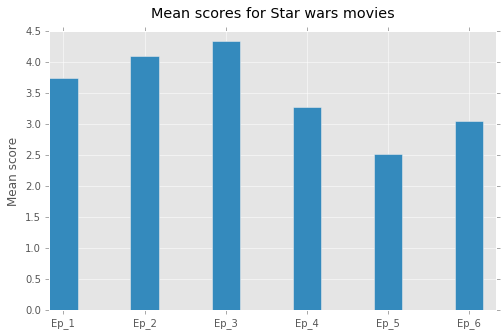

In [508]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

ind = np.arange(len(means))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, means, width)
plt.title('Mean scores for Star wars movies', y=1.03)
plt.xlim(0,5.5)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6'])
plt.ylabel('Mean score')
plt.show()

Since the respondents were asked to rate their favorite episode with 1 and their least favorite with 5, the lower the ranking, the better. From the above, we see that **Episode 5: The Empire Strikes Back** received the highest average scores from the respondents of the survey, whereas **Episode 3: Revenge of the Sith** received the lowest average scores.

## Most seen episode

Let's now see which of the movies have been seen by most viewers.

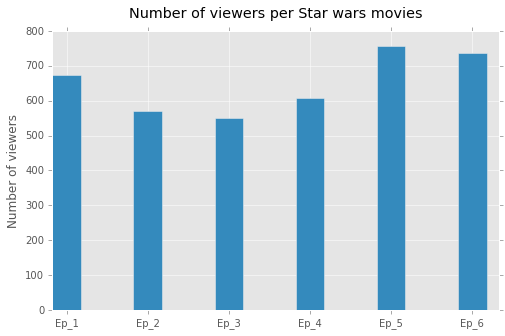

In [509]:
seen_cols = star_wars.columns[3:9]
n_viewers = []

for c in seen_cols:
    n_viewers.append(star_wars[c].sum())
    

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, n_viewers, width)
plt.title('Number of viewers per Star wars movies', y=1.03)
plt.xlim(0,5.5)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6'])
plt.ylabel('Number of viewers')
plt.show()

It looks like the majority of the respondents to the survey saw **Episode 5: The Empire Strikes Back**. The episode with the least number of viewers amongst the respondents is **Episode 3: Revenge of the Sith**. Interestingly, this corresponds with the scores the moviews received.

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` - True or False
- `Do you consider yourself to be a fan of the Star Trek franchise?` - Yes or No
- `Gender` - Male or Female

## By gender

In [510]:
#Let's split the data into two dataframes:

females = star_wars[star_wars['Gender'] == 'Female']
males = star_wars[star_wars['Gender'] == 'Male']

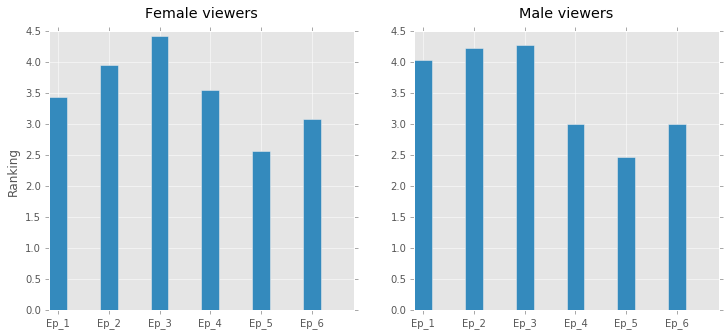

In [511]:
female_means = []
female_ranks = females.columns[9:15]

for c in female_ranks:
    female_means.append(females[c].mean())

male_means = []
male_ranks = males.columns[9:15]

for c in male_ranks:
    male_means.append(males[c].mean())


fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1,2,1)
ax1.bar(i, female_means, w)
ax1.set_title('Female viewers', y=1.03)
ax1.set_ylabel('Ranking')
ax1.set_xticklabels(['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6'])
ax1.set_xticks(ind + width / 2)

ax2 = fig.add_subplot(1,2,2)
ax2.bar(i, male_means, w)
ax2.set_title('Male viewers', y=1.03)
ax2.set_xticklabels(['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6'])
ax2.set_xticks(ind + width / 2)

plt.show()

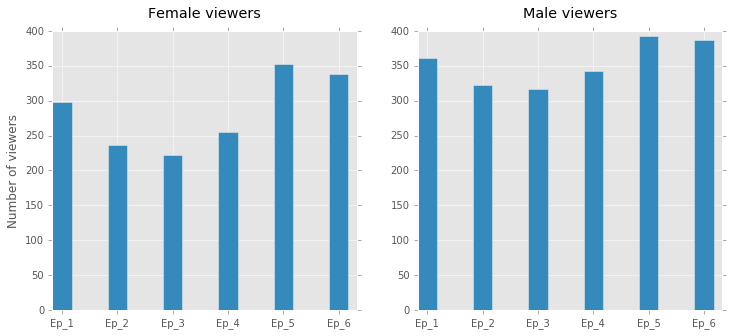

In [512]:
female_views = []
view_cols = females.columns[3:9]

for c in view_cols:
    female_views.append(females[c].sum())

male_views = []
view_col = males.columns[3:9]

for c in view_col:
    male_views.append(males[c].sum())
    

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1,2,1)
ax1.bar(i, female_views, w)
ax1.set_title('Female viewers', y=1.03)
ax1.set_ylabel('Number of viewers')
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6'])
ax1.set_xlim(0, 5.5)

ax2 = fig.add_subplot(1,2,2)
ax2.bar(i, male_views, w)
ax2.set_title('Male viewers', y=1.03)
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6'])
ax2.set_xlim(0, 5.5)
plt.show()

It seems that the split by gender corresponds with the overall result:

- **Episode 5: The Empire Strikes Back** is the highest ranked and least seen by both genders;
- **Episode 3: Revenge of the Sith** is the lowest ranked and most seen by both genders.

Also, it seems that female viewers enjoyed **Episode I The Phantom Menace** and **Episode II Attack of the Clones** a little more than male viewers, however, more male respondents saw the movies.

## By education

In [513]:
by_education = pd.pivot_table(star_wars, index='Education', values = star_wars.columns[9:15])

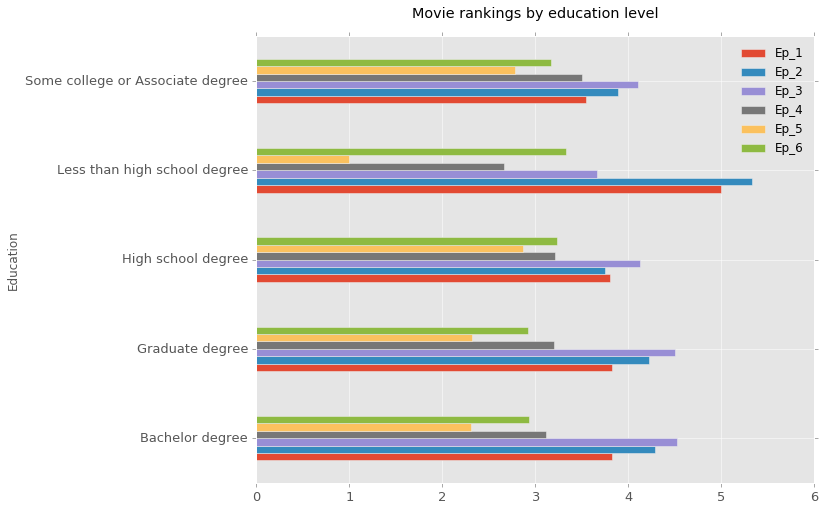

In [514]:
legend = ['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6']
by_education.plot(kind='barh', figsize=(10,8), fontsize=13)
plt.legend(legend, frameon=False)
plt.title('Movie rankings by education level', y=1.03)

Viewers from all education levels are unanimous in their highest ranking of **Episode 5: The Empire Strikes Back**.
Again, **Episode 3: Revenge of the Sith** is the lowest ranked movie among all education groups with the exception of the group with less thanhigh school degree. This group ranks lowest **Episode 2: Attack of the Clones**.

## By location

In [515]:
by_location = pd.pivot_table(star_wars, index='Location (Census Region)', values=star_wars.columns[9:15])

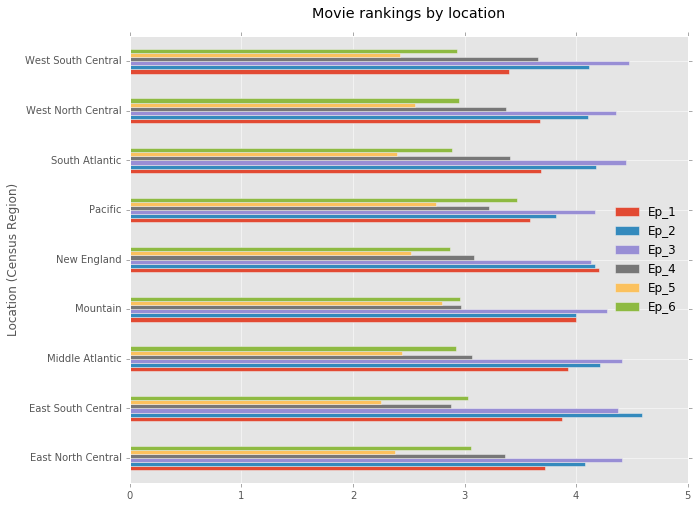

In [516]:
by_location.plot(kind='barh', figsize=(10,8))
plt.legend(legend, frameon=False, loc='center right')
plt.title('Movie rankings by location', y=1.03)

Viewers from all locations are unanimous in their highest ranking of **Episode 5: The Empire Strikes Back**. 

Viewers from all but two locations rank **Episode 3: Revenge of the Sith** the lowest. The two locations that differ are:

- New England - **Episode 1: The Phantom Menace**
- East South Central - **Episode 2: Attack of the Clones**

## Who shot first?

The 'Who shot first' debate refers to a controversial change made to a scene in the science fiction action film Star Wars (1977), in which Han Solo (Harrison Ford) is confronted by the bounty hunter Greedo (Paul Blake) in the Mos Eisley cantina. In the original version of the scene, Han shoots Greedo dead. Later versions are edited so that Greedo attempts to fire at Han first. Director George Lucas altered the scene to give Solo more justification for acting in self-defense. Many fans and commentators oppose the change, feeling it weakens Solo's character. The controversy is referenced in the 2018 film Solo: A Star Wars Story. More on [Wikipedia](https://en.wikipedia.org/wiki/Han_shot_first#:~:text=%22Han%20shot%20first%22%20refers%20to,scene%2C%20Han%20shoots%20Greedo%20dead.)

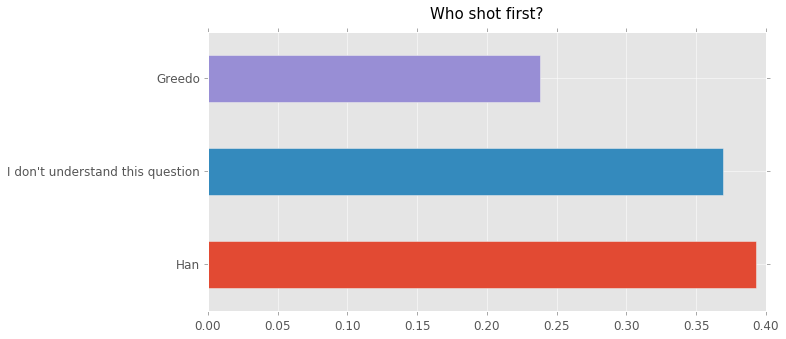

In [517]:
star_wars['Which character shot first?'].value_counts(normalize=True).plot(kind='barh', figsize=(10,5), fontsize=12)
plt.title('Who shot first?', y=1.03, fontsize=15)

In [518]:
who = pd.pivot_table(star_wars, index='Which character shot first?', values=star_wars.columns[3:9], aggfunc=np.sum)

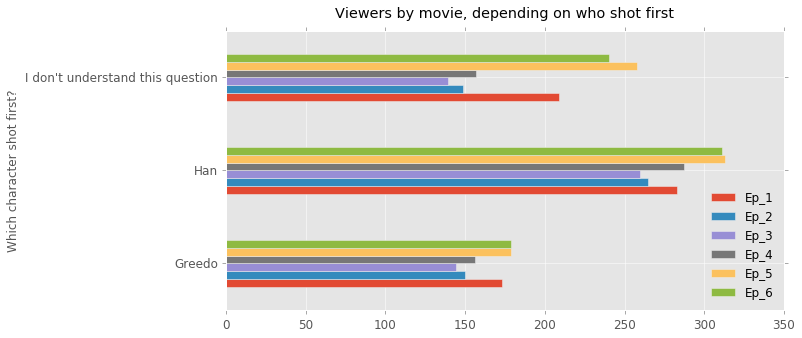

In [519]:
who.plot(kind='barh', figsize=(10,5), fontsize=12)
plt.legend(legend, frameon=False, loc='lower right')
plt.title('Viewers by movie, depending on who shot first', y=1.03)

Since the "Who shot first" debate refers to **Episode 4: A New Hope**, we would expect that the people who did not understand the questions, would have seen that one the least. However, this is not the case. That category of respondents has seen **Episode 3: Revenge of the Sith** the least.

## Characters

Let's clean up the columns in which the respondees rank the characters of the movies and afterwards find out which characters and most and least liked.

In [520]:
#Let's see what the columns currently look like:

star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [521]:
#Let's rename them:

chars = {
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16':'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2-D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala', 
    'Unnamed: 28': 'Yoda'
    }

star_wars = star_wars.rename(columns=chars)
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2-D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

We will convert the ranking system to numbers so that we can make calculations:

- `Very favorably` - for each rating the character will receive 2 points
- `Somewhat favorably` - for each rating the character will receive 1 point
- `Neither favorably nor unfavorably (neutral)` - 0 points
- `Somewhat unfavorably` - for each rating the character will be deducted 1 point
- `Very unfavorably` - for each rating the character will be deducted 2 points
- `Unfamiliar (N/A)` - 0 points

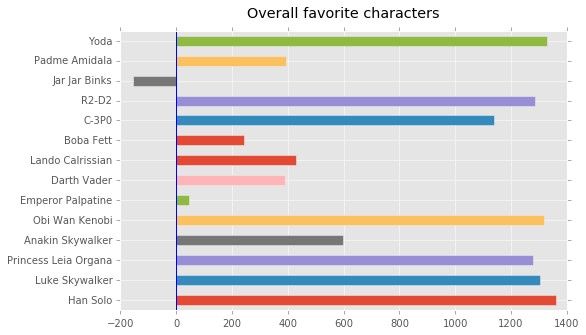

In [533]:
points = {
    'Very favorably': 2,
    'Somewhat favorably': 1,
    'Neither favorably nor unfavorably (neutral)': 0,
    'Somewhat unfavorably': -1,
    'Very unfavorably': -2,
    'Unfamiliar (N/A)': 0,
    np.NaN: 0
    
}

characters = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2-D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda']

star_wars[characters].sum().plot(kind='barh', figsize=(8,5))
plt.title('Overall favorite characters', y=1.03)
plt.axvline()

It turns out that overall, Jar Jar Binks is the least favored Star Wars character among the respondents of the survey, whereas Han Solo is the most favored one.

Let's see if this is the case if we split the respondees by gender.

In [534]:
female_favs = []
male_favs = []

females = star_wars[star_wars['Gender'] == 'Female']
males = star_wars[star_wars['Gender'] == 'Male']

for char in characters:
    female_favs.append(females[char].sum())
    male_favs.append(males[char].sum())

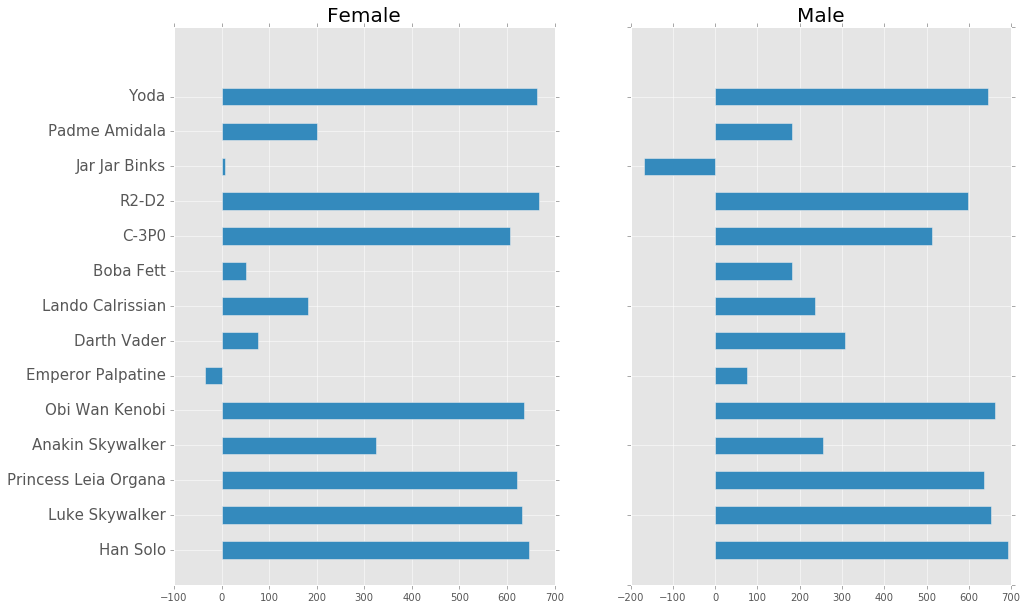

In [553]:
fig = plt.figure(figsize=(15,10))
bp=np.arange(14) + 0.75

ax1 = fig.add_subplot(1,2,1)
ax1.barh(bp, female_favs, 0.5)
ax1.set_title('Female', fontsize=20)
ax1.set_yticklabels(characters, size=15)
tick_positions = range(1,15)
ax1.set_yticks(tick_positions)

ax2 = fig.add_subplot(1,2,2)
ax2.barh(bp, male_favs, 0.5)
ax2.set_title('Male', fontsize=20)
ax2.set_yticklabels([])

plt.show()

It looks like Female respondees are more favorable to Jar Jar Binks than Male respondees are. The overall dislike among Males for Jar Jar contributes significantlly to his overall rating. Female respondees dislike Emperor Palpatine more than they do Jar Jar Binks.
Overall, Han Solo leads with both genders.

## Conclusion

In this guided project we analysed data gathered by the team at [FiveThirtyEight](https://fivethirtyeight.com/). The aim of their questionnaire was to answer the question **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

It turned out that, indeed, the respondees agree that this is the best episode of the series.

Along the way, we analysed various demographic data about the respondees and found out which of the characters is least favored. Poor Jar Jar Binks.